### Title: Bike_rides Real world Project with python




* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)


* #### Github Link: [Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiMzgzOGY4OTQtOWM0NS00YTM2LWI1ZDYtZWVjZTc0YzRhNGFhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

#### Introduction

* The bike rides sales dataset shows different people who have bought the bikes, taking into consideration the number of kids, they have, weather have cars or not, income their location, travelliing miles all those factors determine, if a person buys, the bike or not. This helps the understand its target markets


* The data is a csv file and analysis is done using pandas 

* The data will be saved and exported to power bi for good visualisations

* matplotlib will be used for some data visualisations to get the inisghts of the data

#### Questions to answer

These Questions will be answered under phase3: of the data analysis 

* How many people are married and single
* Number of females and Males
* How many males and females that are married and single
* number of female who are single that have bought the bike and not bought the bike
* number of males married having bought bikes yet owning cars
* Which age is married and has bought a lot of bicycles
* Which Region has people with highest number of bicycles bought by married female
* How many Females with children and cars and have bought the bicycles
* How many Females with children and no cars and have bought the bicycles

* Does commuting distance affect people buying bicycles
* which age group has bought more biclycles
* Does education help in buying of biclycles
* Which region has more parents with children buying bicyles
* Does owning cars have any effect on buying of bicycles

These questions ave been developed by the aurthor to help tell the story

# Phase 1: Data Preparation

This step involves data importation from different sources, libraries import and also the general over view of data to be used is given




In [1]:
import pandas as pd               #for data loading and manipulation

import numpy as np                #for stastical analysis

import matplotlib.pyplot as plt        #for data visualisation

import seaborn as sns

import matplotlib
%matplotlib inline 

import the data from the local machine

In [2]:
na_vals = ['nan', 'NaN', ' ', ' missing', 'Missing', 'naN']     # a list containing all the values to be deemed as null values
df = pd.read_excel(r"C:\Users\Tamie\Downloads\Excel Project Dataset.xlsx", na_values= na_vals)


#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#on this following method inputting r doesnt matter
#import the in the jupyter notebook folder you wroking on and copy the name of the dataset hence insert it in the parentheses

In [3]:
#view the first 5 rows of the dataset
df.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [4]:
# check the number size of the dataset
df.shape

(1026, 13)

The dataset contains 1026 rows and 13 columns

In [5]:
#check the number 
df.columns.to_frame()

,0
ID,ID
Marital Status,Marital Status
Gender,Gender
Income,Income
Children,Children
Education,Education
Occupation,Occupation
Home Owner,Home Owner
Cars,Cars
Commute Distance,Commute Distance


In [10]:
#the data types of the columns
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

# Phase 2: Data Processing 

This step involves all the cleaning, transforming and processing of data

### Step 1: Check for data duplicates

In [11]:
df.duplicated()    #showing all the duplicates however some may not be shown since tey are contained within 

0       False
1       False
2       False
3       False
4       False
        ...  
1021     True
1022     True
1023     True
1024     True
1025     True
Length: 1026, dtype: bool

The true values retained shows the rows that are duplicated

In [12]:
df.duplicated().sum()       #summng up all duplicated values, the rows retainign true actually shows the 
                                                  # the duplicated values

26

There are 26 rows that are duplicated

#### Drop the duplicates

In [13]:
df.drop_duplicates(inplace=True)    #inplace = True make changes to the entire dataset

In [14]:
df.shape

(1000, 13)

The number of rows have been reduced from 1026 to 1000, after droping the duplicated values

### Step 2: Make the Data more understandable for columns in gender and marital statues

In [15]:
#view the dataset first 2 rows
df.head(2)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No


The data entered in the marital Status and Gender need to give out more meaning that is what does M, s, F mean

#### Replace the values

In [16]:
# check all the unique values that can be replaced for marital status
df['Marital Status'].unique()

array(['M', 'S'], dtype=object)

M is for married and S is for single

In [17]:
# check all the unique values that can be replaced for Gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

F is for female and M is for Male

In [18]:
df['Marital Status'].replace({'M': 'Married', 'S': 'Single'},inplace=True)


In [19]:
df['Gender'].replace({'M': 'Male', 'F': 'Female'},inplace=True)

In [20]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [21]:
df.Income.dtypes

dtype('int64')

### Step 3: Check for null values, or missing values

In [22]:
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

There are no missing values

### Step 4: Convert the data types to suitable data types

In [23]:
#check the datatypes of the dataset
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

Commute distance has to be converted to float

In [24]:
#view the Commute distance column
df['Commute Distance'].head()

0     0-1 Miles
1     0-1 Miles
2     2-5 Miles
3    5-10 Miles
4     0-1 Miles
Name: Commute Distance, dtype: object

There are 2  types of values that might restrict our changes
* 10+ values
* range value e.g 2-4

The first step to convert this to float dataype is to:
  * split the column at the occurance of each step to remove the miles
  * implement the function that calculates the average of the ranges give

lets deal with the 10+ like values first

In [27]:
#this can be done by replacing the values + with nothing
Split_data = df['Commute Distance'].apply(lambda x: x.replace('+', ''))
Split_data

0       0-1 Miles
1       0-1 Miles
2       2-5 Miles
3      5-10 Miles
4       0-1 Miles
          ...    
995     2-5 Miles
996     2-5 Miles
997     0-1 Miles
998     1-2 Miles
999      10 Miles
Name: Commute Distance, Length: 1000, dtype: object

The pluses have been removed


lets deal with the ranges values

In [29]:
#splliting the dataset 
Split_data = Split_data.apply(lambda x: x.split(' ')[0])        #[0] takes the first column of the splitted column

Split_data.head

<bound method NDFrame.head of 0       0-1
1       0-1
2       2-5
3      5-10
4       0-1
       ... 
995     2-5
996     2-5
997     0-1
998     1-2
999      10
Name: Commute Distance, Length: 1000, dtype: object>

Miles units have been removed also

In [30]:
#implement a function that calculates the mean of the given values

def mean_range(x):                         #the function name is mean_range taking in one parameter
     
    values = x.split('-')                   # setting a variable that contains the splitted columns at the occurance of '-'
    if len(values) == 2:                         #a condition that checks if the splitted value has 2 figures
        return(float(values[0]) + float(values[1]) / 2)                    # returning a mean value
    try:
        return(float(x))                               #converts the values that areint in range to float
    except:
        return None                                  # return nothing if the values in the column do not meet all the mentioned conditions above

In [31]:
Split_data = Split_data.apply(mean_range)

In [32]:
#check the datatype
Split_data.dtypes

dtype('float64')

Yes. There we go the datatype has been changed from object to float 64

In [34]:
Split_data['Calculated mean distance'] = Split_data

In [35]:
Split_data['Calculated mean distance'].head()

0     0.5
1     0.5
2     4.5
3    10.0
4     0.5
Name: Commute Distance, dtype: object

In [36]:
#last step lets concat it to the main data frame
df = pd.concat([df, Split_data['Calculated mean distance']], axis=1)

In [37]:
#view the dataset
df.head(3)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5
1,24107.0,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0.5
2,14177.0,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,4.5


### step 4: Binning

* This is a step to convert the numerical continous variables into discrete categorial variables
* in this exercise there is need to changed the age into middle, young and old age

In [39]:
#check the stats on the column age of the datasset

df['Age'].describe()

count    1000.000000
mean       44.163000
std        11.364488
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

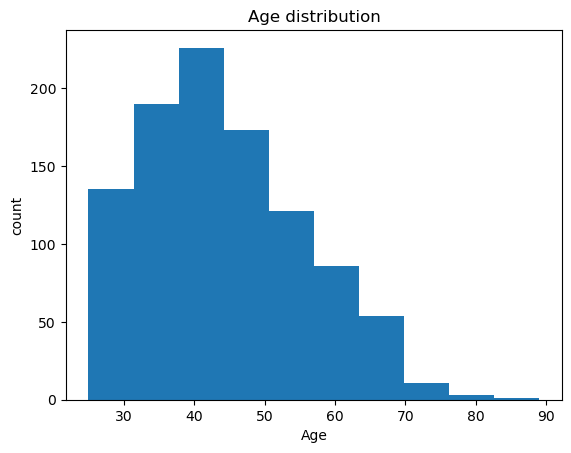

In [40]:
#visualise the distrubution of the Age variables
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['Age'])

plt.pyplot.title('Age distribution')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('count')

In [41]:
bins = np.linspace(df['Age'].min(), df['Age'].max(), 4)    #equal division of age into age groups
bins

array([25.        , 46.33333333, 67.66666667, 89.        ])

In [42]:
group_names = ['Young','Middle', 'Old']          #group the age into different categories

In [43]:
df['Ageing'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest=True)    #implement the pd.cut to group the ages into age groups


df[['Age', 'Ageing']].head()    #view these 2 columns only

,Age,Ageing
0,42.0,Young
1,43.0,Young
2,60.0,Middle
3,41.0,Young
4,36.0,Young


<BarContainer object of 3 artists>

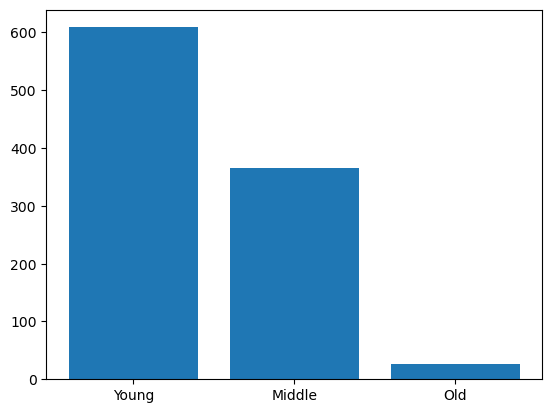

In [44]:
# visualise the new column and distribution

plt.pyplot.bar(group_names, df['Ageing'].value_counts())

### Step 5: Create the indicator variable or dummy variable

* An indicator variable (or dummy variable) is a numerical variable used to label categories
* In this dataset the purchased bike column. Lets create the dummy variables inorder to be able to use it for regression estimation in machine learning. However Machine learning learning part is not covered in this notebook

In [45]:
#view the dataset
df.head(2)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young
1,24107.0,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0.5,Young


In [46]:
#lets get the dummy variables in purchased Bike
get_dummy = pd.get_dummies(df['Purchased Bike'])
get_dummy.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [47]:
#lets rename the columns to purchased bike and did not purchase bike
get_dummy.rename(columns={'No': 'did not buy bicycles', 'Yes':'Bought bicyles'}, inplace=True)
get_dummy

,did not buy bicycles,Bought bicyles
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
996,0,1
997,0,1
998,1,0
999,0,1


this can be concated to the main data frame
however its not part of the scope of this project hence it will be commented out



In [48]:
#df = pd.concat([df, get_dummy], axis=1)

#this jjoins the get dummy dataframe to the initial dataframe

# Phase 3: Data Analysis

This phase Analyzes the cleaned data to get more insights of the data, to answer some questions

In [49]:
df.head(1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young


#### Q1: How many people are married and single


In [50]:
df['Marital Status'].value_counts().to_frame()

,Marital Status
Married,538
Single,462


More people are married 538 and 462 are single

#### Q2: Number of females and Males

In [51]:
df['Gender'].value_counts().to_frame()

,Gender
Male,511
Female,489


There are more males 511 and female are 489

#### Q3: How many males and females that are married and single

In [52]:
df.groupby('Marital Status')['Gender'].value_counts()          #grouping the marital statues to gender

Marital Status  Gender
Married         Male      299
                Female    239
Single          Female    250
                Male      212
Name: Gender, dtype: int64

the break down of gender according to their marital status

#### Q4: number of female who are single that have bought the bike and not bought the bike

In [53]:
filt = (df['Gender'] == 'Female') & (df['Marital Status'] == 'Single')      #setting the filtering variable
df[filt]['Purchased Bike'].value_counts()

Yes    131
No     119
Name: Purchased Bike, dtype: int64

single females have bought bike about 131 against 119

#### Q5: number of males married having bought bikes yet owning cars

In [54]:
# view the dataset

df.head(1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young


In [55]:
filt = (df['Gender'] == 'Male') & (df['Cars'] > 0) & (df['Marital Status'] == 'Married')
df[filt]['Purchased Bike'].value_counts().to_frame()

,Purchased Bike
No,145
Yes,82


Few married man owning cars have bought the cars

#### Q6: Which age is married and has bought a lot of bicycles

In [56]:
filt = (df['Marital Status'] == 'Married') & (df['Purchased Bike'] == 'Yes')                        #setting the filtering variable
df[filt][['Age', 'Gender']].value_counts()

Age   Gender
34.0  Female    9
35.0  Male      8
38.0  Male      7
48.0  Male      7
37.0  Female    7
               ..
39.0  Male      1
56.0  Male      1
41.0  Male      1
53.0  Male      1
78.0  Male      1
Length: 73, dtype: int64

#### Q7 Which Region has people with highest number of bicycles bought by married female

In [57]:
df.head(1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young


In [58]:
filt = (df['Gender'] == 'Female') & (df['Marital Status'] == 'Married') & (df['Purchased Bike'] == 'Yes') 
df[filt]['Region'].value_counts()

North America    51
Europe           38
Pacific          19
Name: Region, dtype: int64

#### Q8 How many Females with children and cars and have bought the bicycles

view the dataset again 

In [59]:
df.head(1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young


In [60]:
filt = (df['Gender'] =='Female') & (df['Children'] > 0) & (df['Cars'] > 0)
df[filt]['Purchased Bike'].value_counts().to_frame()

,Purchased Bike
No,143
Yes,116


Females that have cars and more than 1 child bought less bicycles 

#### Q8b How many Females with children and no cars and have bought the bicycles

In [61]:
filt = (df['Gender'] =='Female') & (df['Children'] > 1) & (df['Cars'] == 0)
df[filt]['Purchased Bike'].value_counts().to_frame()

,Purchased Bike
Yes,32
No,23


more females without cars and with children have bought more bicyles than those without

#### Q9: 9 which income has more people buying the bicycles

In [62]:
df.head(1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young


In [63]:
filt = (df['Purchased Bike'] == 'Yes')
df[filt][['Income', 'Purchased Bike']].sort_values(by = 'Income', ascending=False)

,Income,Purchased Bike
43,170000.0,Yes
6,160000.0,Yes
178,160000.0,Yes
321,160000.0,Yes
356,150000.0,Yes
...,...,...
115,10000.0,Yes
235,10000.0,Yes
322,10000.0,Yes
129,10000.0,Yes


more people with more income have purchased the bikes

In [64]:
#view the dataframe again
df.head(2)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young
1,24107.0,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0.5,Young


### Q11 which age group has bought more biclycles


In [66]:
filt = (df['Purchased Bike'] == 'Yes')
df[filt][['Age', 'Purchased Bike']].value_counts()

Age   Purchased Bike
36.0  Yes               30
38.0  Yes               29
37.0  Yes               28
35.0  Yes               22
47.0  Yes               20
43.0  Yes               19
34.0  Yes               19
40.0  Yes               18
46.0  Yes               15
52.0  Yes               15
41.0  Yes               15
32.0  Yes               14
45.0  Yes               13
48.0  Yes               13
33.0  Yes               13
53.0  Yes               13
39.0  Yes               12
50.0  Yes               12
51.0  Yes               12
44.0  Yes               12
42.0  Yes               12
54.0  Yes               11
28.0  Yes               10
26.0  Yes                8
49.0  Yes                8
31.0  Yes                8
27.0  Yes                8
60.0  Yes                7
59.0  Yes                6
66.0  Yes                6
29.0  Yes                5
55.0  Yes                5
62.0  Yes                4
61.0  Yes                4
25.0  Yes                4
58.0  Yes                4
57.0  Y

In [67]:
df['Age'].describe()

count    1000.000000
mean       44.163000
std        11.364488
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

In [68]:
#12 Does occupation affect the buying of bicyles

In [69]:
filt = (df['Purchased Bike'] == 'Yes')
df[filt][['Occupation', 'Purchased Bike']].value_counts()

Occupation      Purchased Bike
Professional    Yes               150
Skilled Manual  Yes               115
Clerical        Yes                88
Management      Yes                73
Manual          Yes                55
dtype: int64

More professional have bought more and many bics and the manual workers have bought a few this is because of their incomes

In [70]:
#checking their incomes

In [71]:
df.groupby('Occupation').Income.sum().sort_values(ascending=False)

Occupation
Professional      20720000.0
Management        14990000.0
Skilled Manual    13160000.0
Clerical           5500000.0
Manual             1990000.0
Name: Income, dtype: float64

Manual workers might be restricted to buy in because of their financial status which is a bit low

#### Q13 Does education help in buying of biclycles


In [72]:
df.head(1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Commute Distance,Ageing
0,12496.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.5,Young


In [73]:
filt = (df['Purchased Bike'] == 'Yes')
df[filt][['Education']].value_counts()

Education          
Bachelors              169
Partial College        119
Graduate Degree         94
High School             79
Partial High School     20
dtype: int64

Bachelors have the highest buying of bicycles, this could be due to their population, hence its essential to check the size number of the group

In [74]:
df.groupby('Education')['Purchased Bike'].value_counts()     

Education            Purchased Bike
Bachelors            Yes               169
                     No                137
Graduate Degree      Yes                94
                     No                 80
High School          No                100
                     Yes                79
Partial College      No                146
                     Yes               119
Partial High School  No                 56
                     Yes                20
Name: Purchased Bike, dtype: int64

from this the buying rate seems to level up due to population present

#### Q14 Does owning cars have any effect on buying of bicycles

In [76]:
df.groupby('Cars')['Purchased Bike'].value_counts()

Cars  Purchased Bike
0.0   Yes               151
      No                 96
1.0   Yes               152
      No                115
2.0   No                218
      Yes               124
3.0   No                 52
      Yes                33
4.0   No                 38
      Yes                21
Name: Purchased Bike, dtype: int64

more people with no cars have bought bicycles

# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### 4.1: number of married and singles

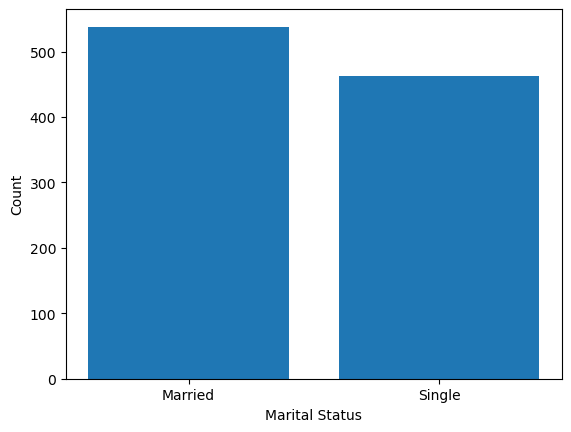

In [90]:
import matplotlib.pyplot as plt

marital_status_counts = df['Marital Status'].value_counts().to_frame()

plt.bar(marital_status_counts.index, marital_status_counts['Marital Status'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


##### * **key takeaway:**  there are more married than single people

### 4.2: total number of males and females

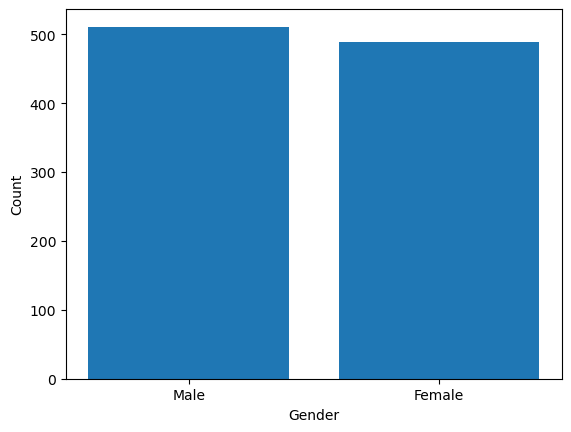

In [89]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##### * **key takeaway:**  there are more males than females

### 4.3: age of people who purchased bikes

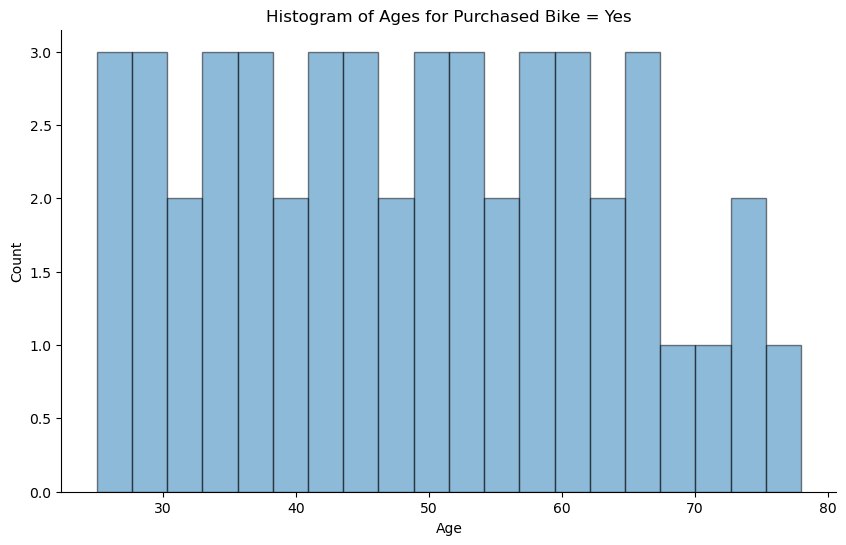

In [82]:


filt = (df['Purchased Bike'] == 'Yes')
values = df[filt][['Age', 'Purchased Bike']].value_counts()

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(values.index.get_level_values('Age'), bins=20, edgecolor='black', alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Histogram of Ages for Purchased Bike = Yes')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


##### * **key takeaway:**  less old people bought bicycles

### 4.4: Total Income by Occupation

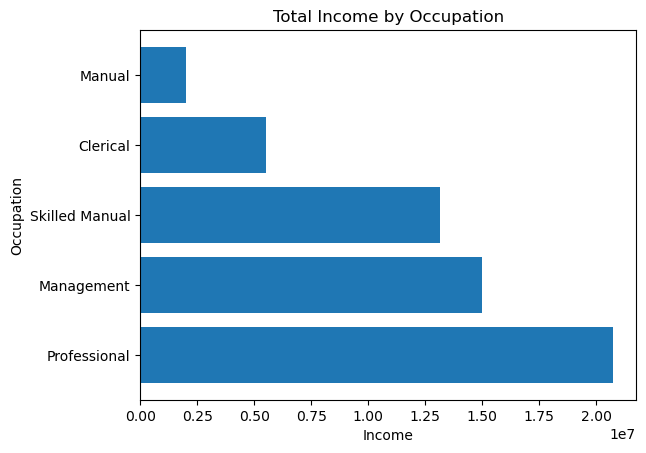

In [83]:


income_by_occupation = df.groupby('Occupation').Income.sum().sort_values(ascending=False)

plt.barh(income_by_occupation.index, income_by_occupation.values)
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.title('Total Income by Occupation')
plt.show()


##### * **key takeaway:**  professionals have more income than the rest, the least being manual

### 4.5: Bike Purchase by Females with >1 Children and No Cars

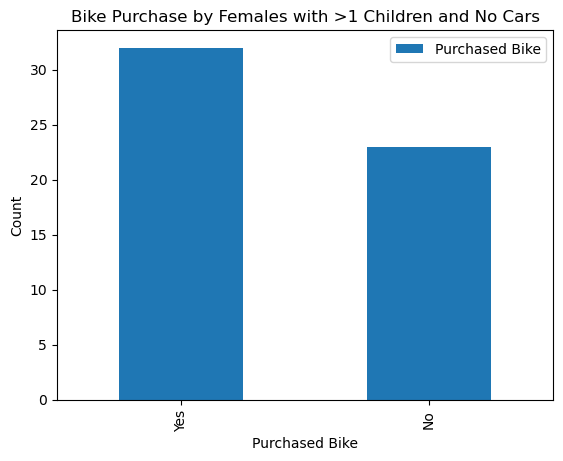

In [91]:
filt = (df['Gender'] =='Female') & (df['Children'] > 1) & (df['Cars'] == 0)
df[filt]['Purchased Bike'].value_counts().to_frame().plot(kind='bar')
plt.xlabel('Purchased Bike')
plt.ylabel('Count')
plt.title('Bike Purchase by Females with >1 Children and No Cars')
plt.show()


##### * **key takeaway:**  more females with more than one kid bought more bics

### 4.6: Bike Purchases by Females with Children and Cars

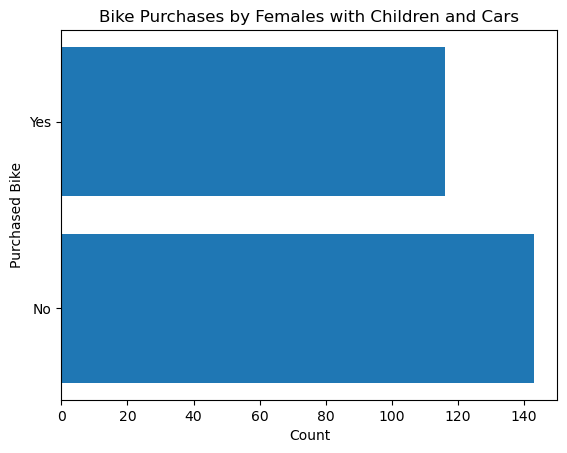

In [93]:
import matplotlib.pyplot as plt

filt = (df['Gender'] =='Female') & (df['Children'] > 0) & (df['Cars'] > 0)
purchased_counts = df[filt]['Purchased Bike'].value_counts().to_frame()

plt.barh(purchased_counts.index, purchased_counts['Purchased Bike'])
plt.xlabel('Count')
plt.ylabel('Purchased Bike')
plt.title('Bike Purchases by Females with Children and Cars')
plt.show()


##### * **key takeaway:**  parents with cars brought less bics compared to the ones without

### 4.7:Region Counts for Female Married Customers Who Purchased a Bike

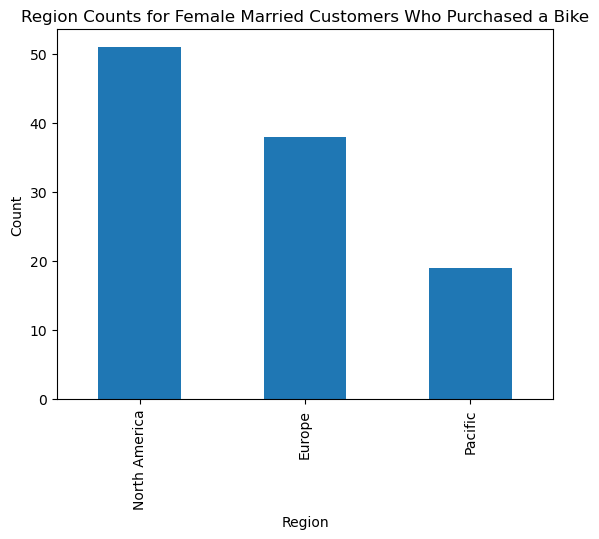

In [94]:
import matplotlib.pyplot as plt

filt = (df['Gender'] == 'Female') & (df['Marital Status'] == 'Married') & (df['Purchased Bike'] == 'Yes')
region_counts = df[filt]['Region'].value_counts()

region_counts.plot(kind='bar')
plt.title("Region Counts for Female Married Customers Who Purchased a Bike")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


##### * **key takeaway:**  north american ladies have bought more bics than women from europe and pacific

### 4.8: Gender Count by Marital Status

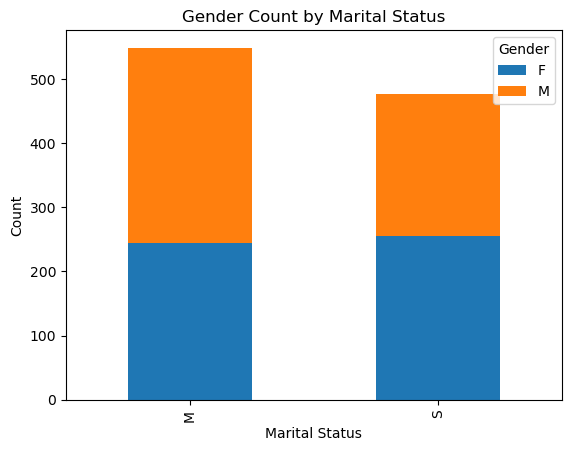

In [7]:
import matplotlib.pyplot as plt

grouped = df.groupby('Marital Status')['Gender'].value_counts().unstack()
grouped.plot(kind='bar', stacked=True)

plt.title('Gender Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()


##### * **key takeaway:**  there are more females who are single in the dataset

In [6]:
#saving the dataset for more vizualisation
df.to_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\cleaned bike_rides")

#### Further data Visualization was done in powerbi: [Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiMzgzOGY4OTQtOWM0NS00YTM2LWI1ZDYtZWVjZTc0YzRhNGFhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

## Author: TamiriraIshe Nyevera

## Date: 3 January 2023

* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiMzgzOGY4OTQtOWM0NS00YTM2LWI1ZDYtZWVjZTc0YzRhNGFhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)